In [9]:
import os 
import numpy as np 
from locscale.include.emmer.ndimage.map_utils import load_map, save_as_mrc
from locscale.emmernet.run_emmernet import preprocess_map 
from locscale.emmernet.emmernet_functions import load_smoothened_mask

parent_dir = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_3061/predicting_reference"

unsharpened_map_path = os.path.join(parent_dir, "EMD_3061_unfiltered.mrc")
predicted_map_path = os.path.join(parent_dir, "processing_files", "EMD_3061_unfiltered_model_map_predicted.mrc")
mask_path = os.path.join(parent_dir, "processing_files", "EMD_3061_unfiltered_confidenceMap.mrc")

unsharpened_map, apix = load_map(unsharpened_map_path)
predicted_map, _ = load_map(predicted_map_path)
mask = load_smoothened_mask(mask_path)[0]


Mask threshold: 0.5
Cosine filter: 3


In [12]:
from locscale.include.emmer.ndimage.map_utils import resample_map, load_map
preprocessed_unsharpened_map = preprocess_map(unsharpened_map, apix)
predicted_map_resampled = resample_map(predicted_map, apix=apix, apix_new=1)
preprocessed_mask = preprocess_map(mask, apix, standardize=False)
print(preprocessed_unsharpened_map.shape)
print(predicted_map_resampled.shape)

print("Mean of unsharpened map: ", np.mean(preprocessed_unsharpened_map))
print("Std of unsharpened map: ", np.std(preprocessed_unsharpened_map))
print("Mean of predicted map: ", np.mean(predicted_map_resampled))
print("Std of predicted map: ", np.std(predicted_map_resampled))





(252, 252, 252)
(252, 252, 252)
Mean of unsharpened map:  -3.879056e-09
Std of unsharpened map:  0.10000012
Mean of predicted map:  0.002526774
Std of predicted map:  0.016624667


In [19]:
mask_binarised = preprocessed_mask > 0.5
intensities_unsharpened = preprocessed_unsharpened_map[mask_binarised]
intensities_predicted = predicted_map_resampled[mask_binarised]

In [20]:
# plot the intensities as a scatter plot
len (intensities_unsharpened)

706529

Text(0, 0.5, 'Predicted map')

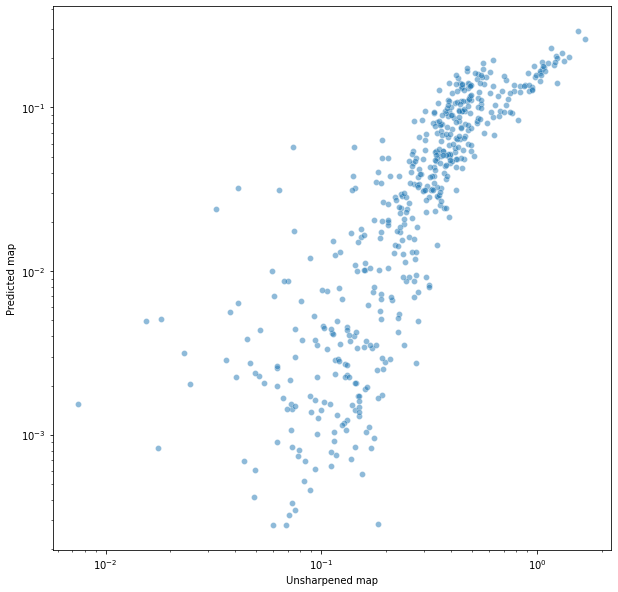

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sample_size = 500
sample_indices = np.random.choice(len(intensities_unsharpened), sample_size, replace=False)
intensities_unsharpened_sample = intensities_unsharpened[sample_indices]
intensities_predicted_sample = intensities_predicted[sample_indices]

plt.figure(figsize=(10, 10))
sns.scatterplot(x=intensities_unsharpened_sample, y=intensities_predicted_sample, alpha=0.5)
# change y scale and x scale
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Unsharpened map")
plt.ylabel("Predicted map")



In [1]:

def invert_intensities(cubes):
    cubes_inverted = np.empty_like(cubes)
    for cube in cubes:
        maxvalue, minvalue = np.max(cube), np.min(cube)
        cube_inverted = maxvalue - cube + minvalue
        cubes_inverted = np.append(cubes_inverted, cube_inverted, axis=0)
    return cubes_inverted